In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import os
from model.classifier import Classifier
import matplotlib.pyplot as plt
import numpy as np

In [75]:
log_dir = "./log/linear_L1_C_1e_2_2022_12_22_18_02_35_412106/"
file_dir = log_dir + "50/"

In [76]:
model = Classifier(28*28, 10)                                                    # 调用模型Model
model.load_state_dict(torch.load(file_dir+"model_parameter.pkl"))    # 加载模型参数     

<All keys matched successfully>

In [77]:
print(model.w.shape)
print(model.b.shape)

torch.Size([10, 784])
torch.Size([10])


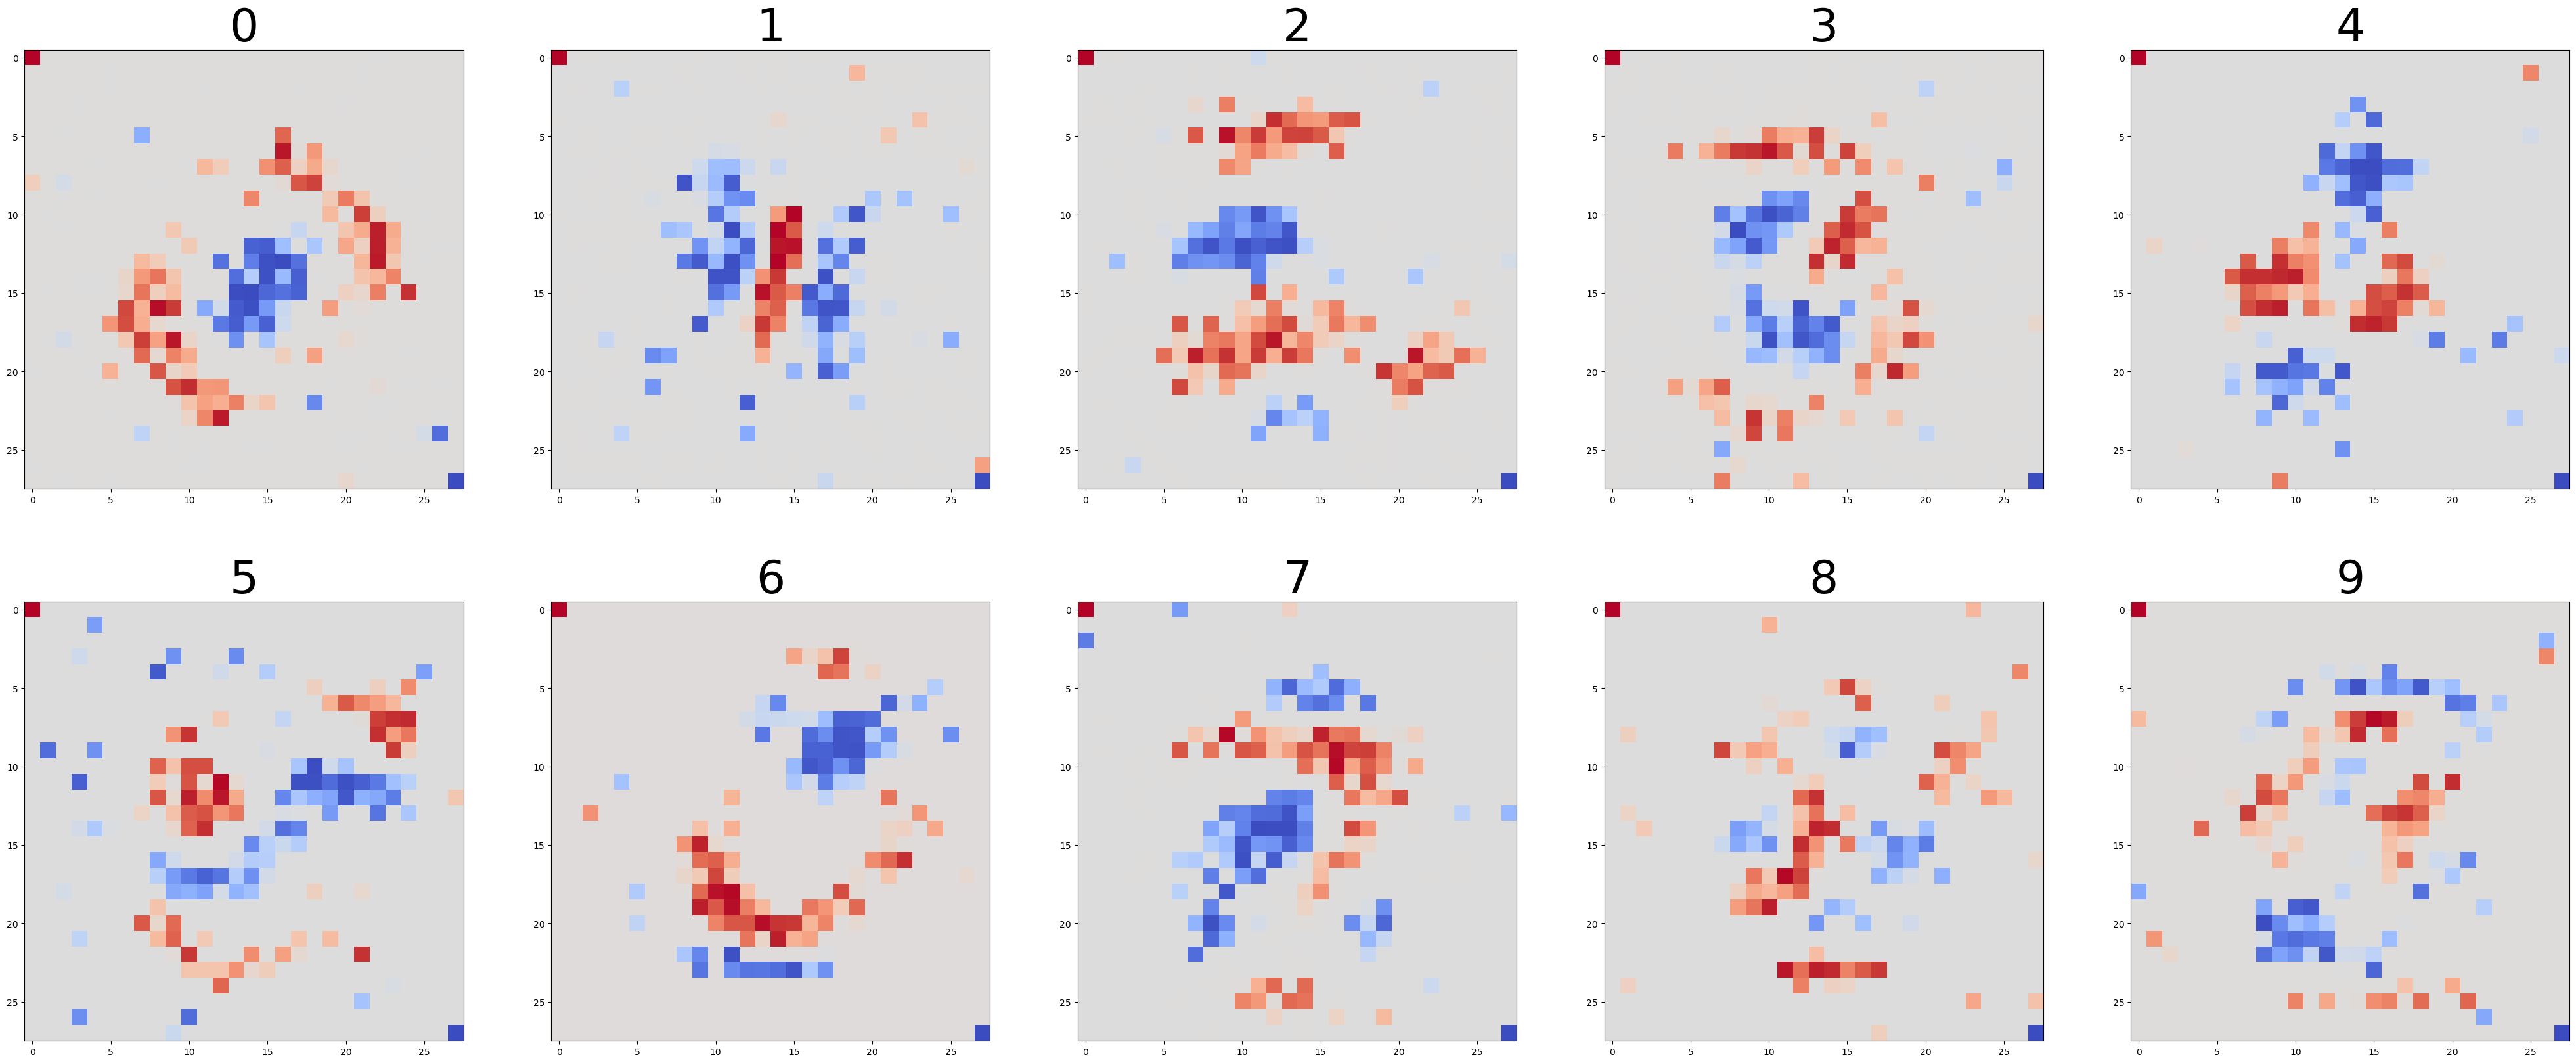

In [78]:
w = model.w.reshape(10, 28, 28).detach().numpy()
b = model.b.detach().numpy()
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

img = []
for wi, bi in zip(w, b):
    img.append(wi+bi/np.sum(wi))
img = np.array(img)

for i in range(2):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        axes[i,j].imshow(np.tanh(img[i*5+j]/5e-2), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j),{'fontsize':50})